In [3]:
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import datetime as dt

In [5]:
tickers = ["GOOG", "AMZN", "MSFT", "META"]
start = dt.datetime.today() - dt.timedelta(4650)
end = dt.datetime.today()
ohlcv = {}
cl_price = pd.DataFrame()

In [6]:
for ticker in tickers:
  cl_price[ticker] = yf.download(ticker, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
cl_price.isna().sum()

GOOG      0
AMZN      0
MSFT      0
META    538
dtype: int64

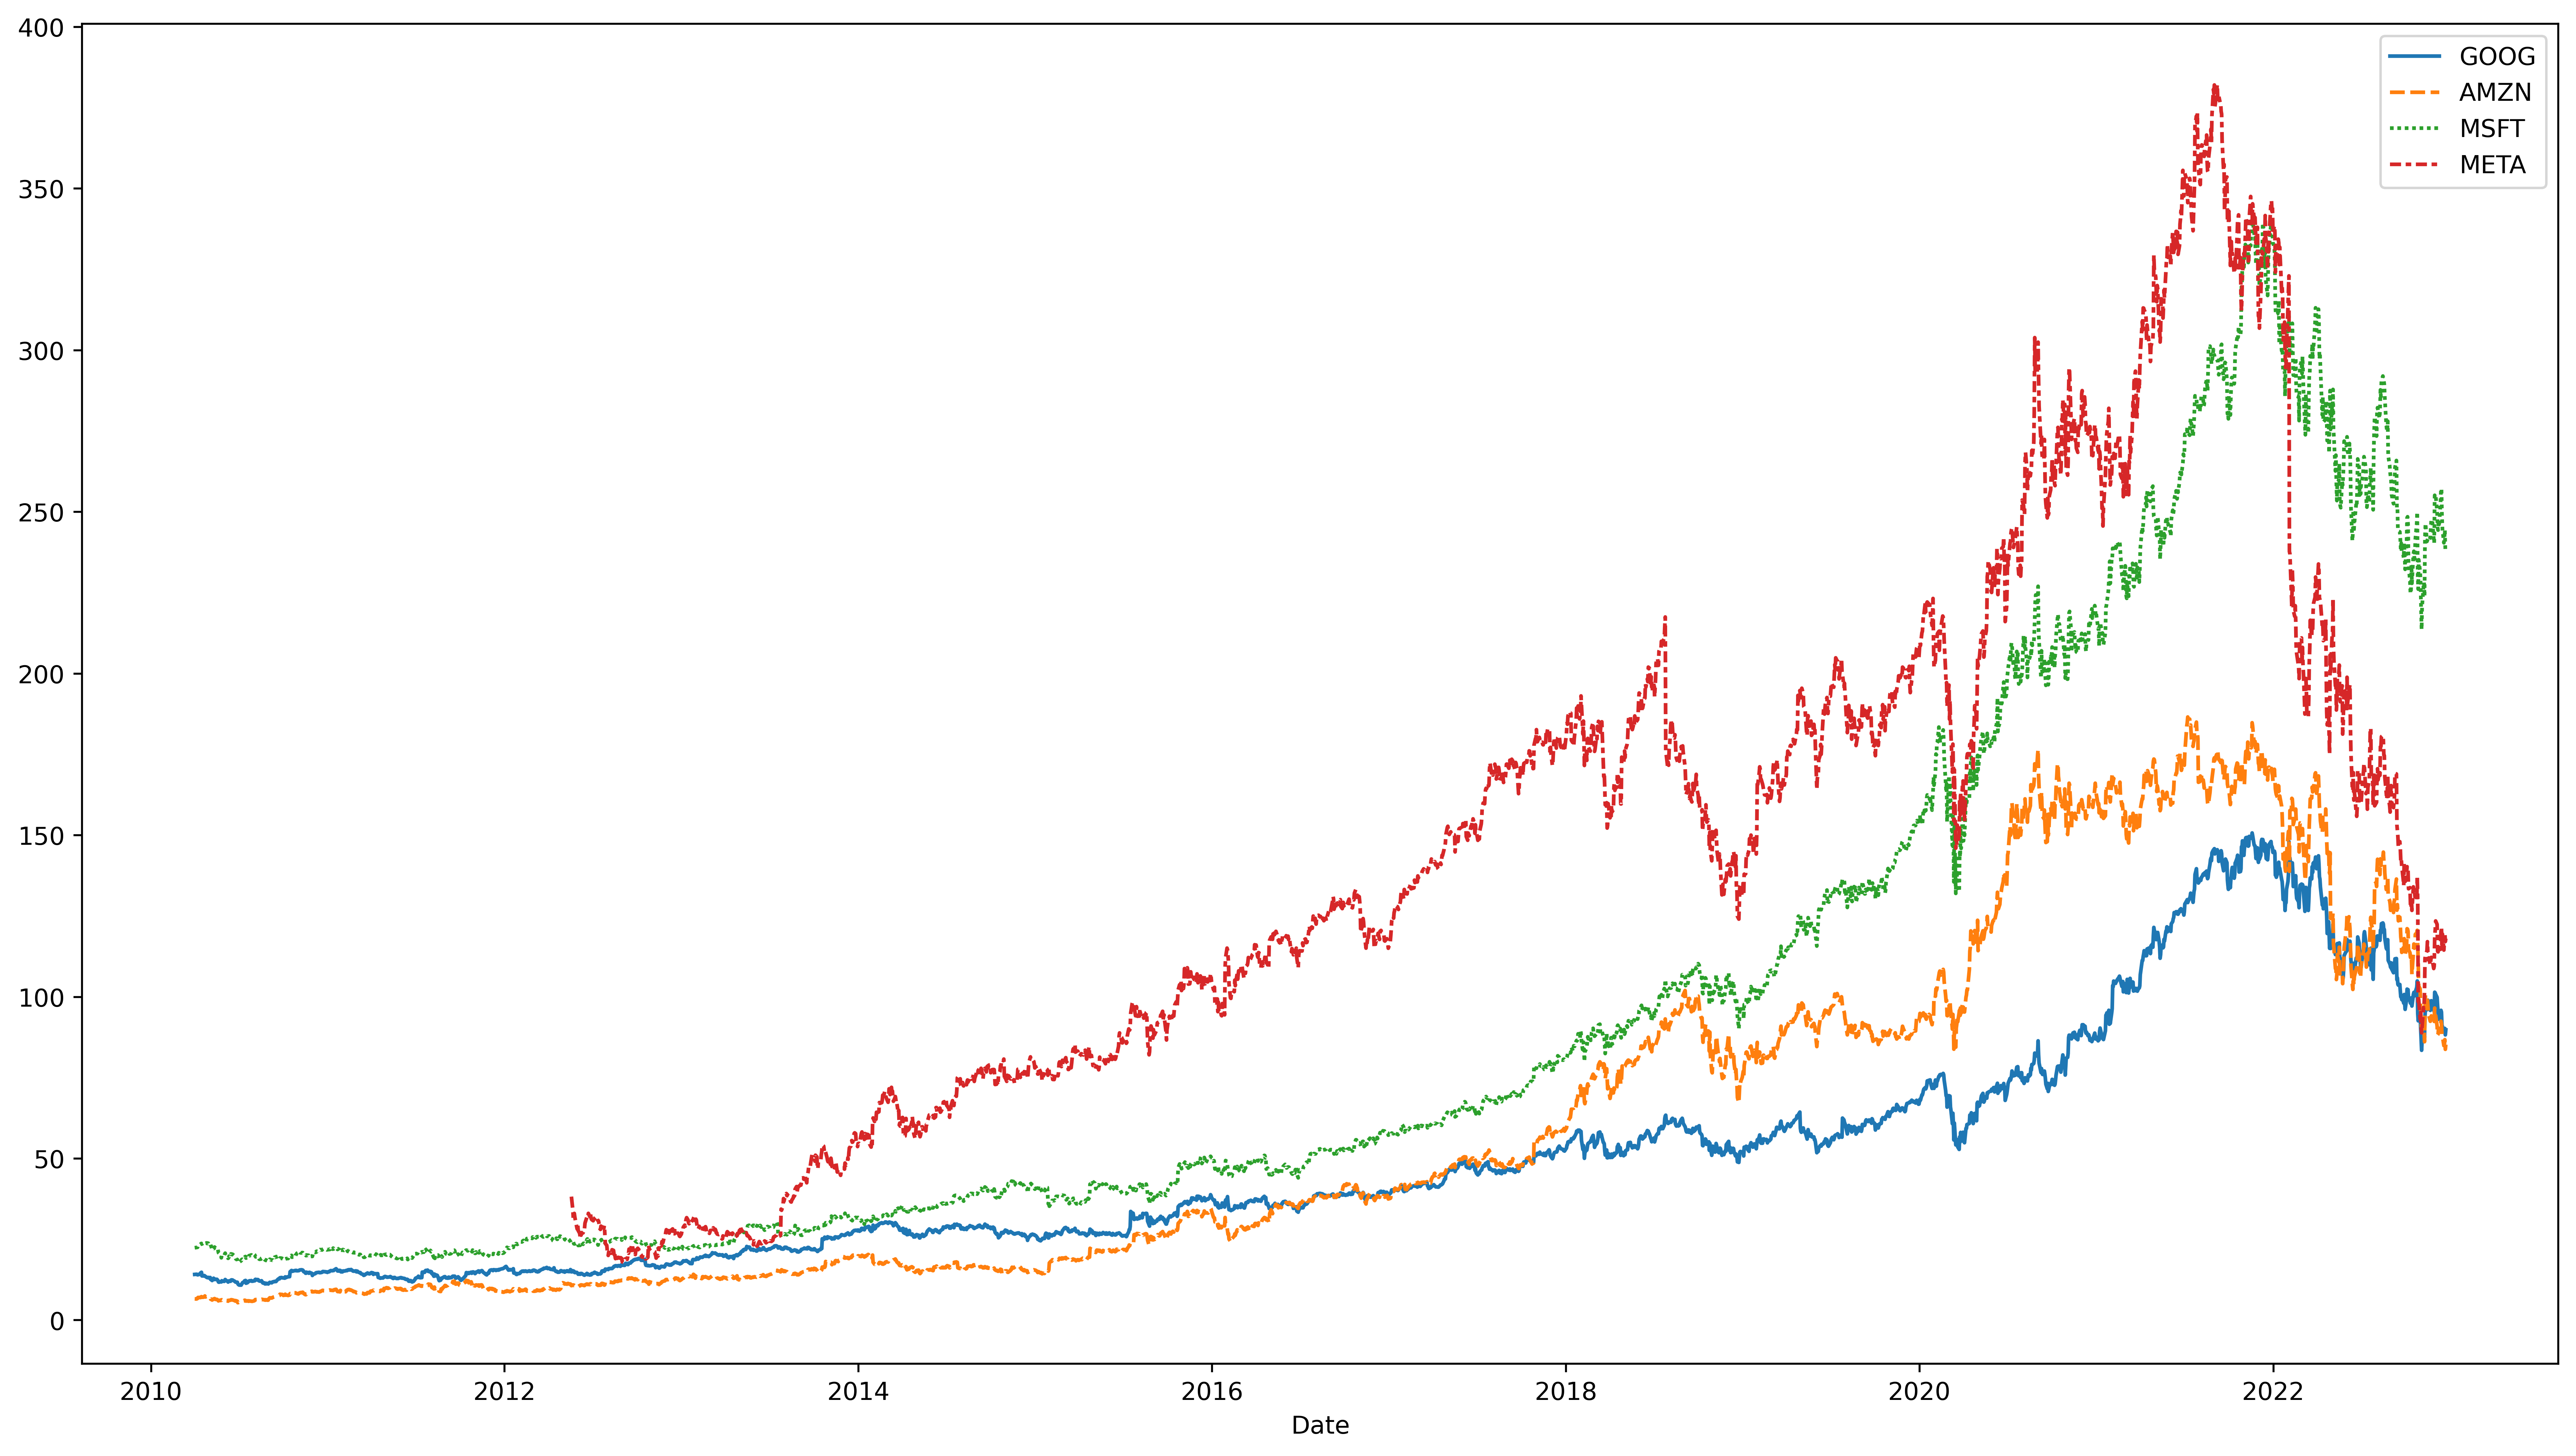

In [9]:
plt.figure(figsize = (18,10), dpi = 500)
sns.lineplot(data = cl_price)

In [10]:
cl_price.dropna(axis = 0, how = 'any',inplace = True)

In [11]:
cl_price.describe()

,GOOG,AMZN,MSFT,META
count,2669.000000,2669.000000,2669.000000,2669.000000
mean,56.781230,70.168743,111.707623,148.036448
std,35.584674,53.747478,90.799925,87.056669
min,13.924059,10.411000,21.743969,17.730000
25%,28.229937,18.929501,39.159271,77.830002
50%,47.868500,49.730999,69.216873,142.529999
75%,71.543999,100.550003,178.551300,191.339996
max,150.709000,186.570496,339.924805,382.179993


In [12]:
daily_return = cl_price.pct_change() 
daily_return.describe()

,GOOG,AMZN,MSFT,META
count,2668.000000,2668.000000,2668.000000,2668.000000
mean,0.000814,0.000984,0.001007,0.000744
std,0.016893,0.020335,0.016841,0.025280
min,-0.111008,-0.140494,-0.147390,-0.263901
25%,-0.006708,-0.008605,-0.006673,-0.010112
50%,0.000690,0.000921,0.000707,0.000877
75%,0.008903,0.011109,0.009284,0.012629
max,0.160524,0.141311,0.142169,0.296115


In [13]:
cl_price/cl_price.shift(1) - 1

,GOOG,AMZN,MSFT,META
Date,,,,
2012-05-18,NaN,NaN,NaN,NaN
2012-05-21,0.022835,0.019921,0.016399,-0.109861
2012-05-22,-0.021674,-0.012746,0.000336,-0.089039
2012-05-23,0.014414,0.009056,-0.021842,0.032258
2012-05-24,-0.009517,-0.009389,-0.001374,0.032187
...,...,...,...,...
2022-12-19,-0.018820,-0.033462,-0.017328,-0.041447
2022-12-20,0.005384,0.003180,0.005614,0.022799
2022-12-21,0.006917,0.018547,0.010877,0.022803


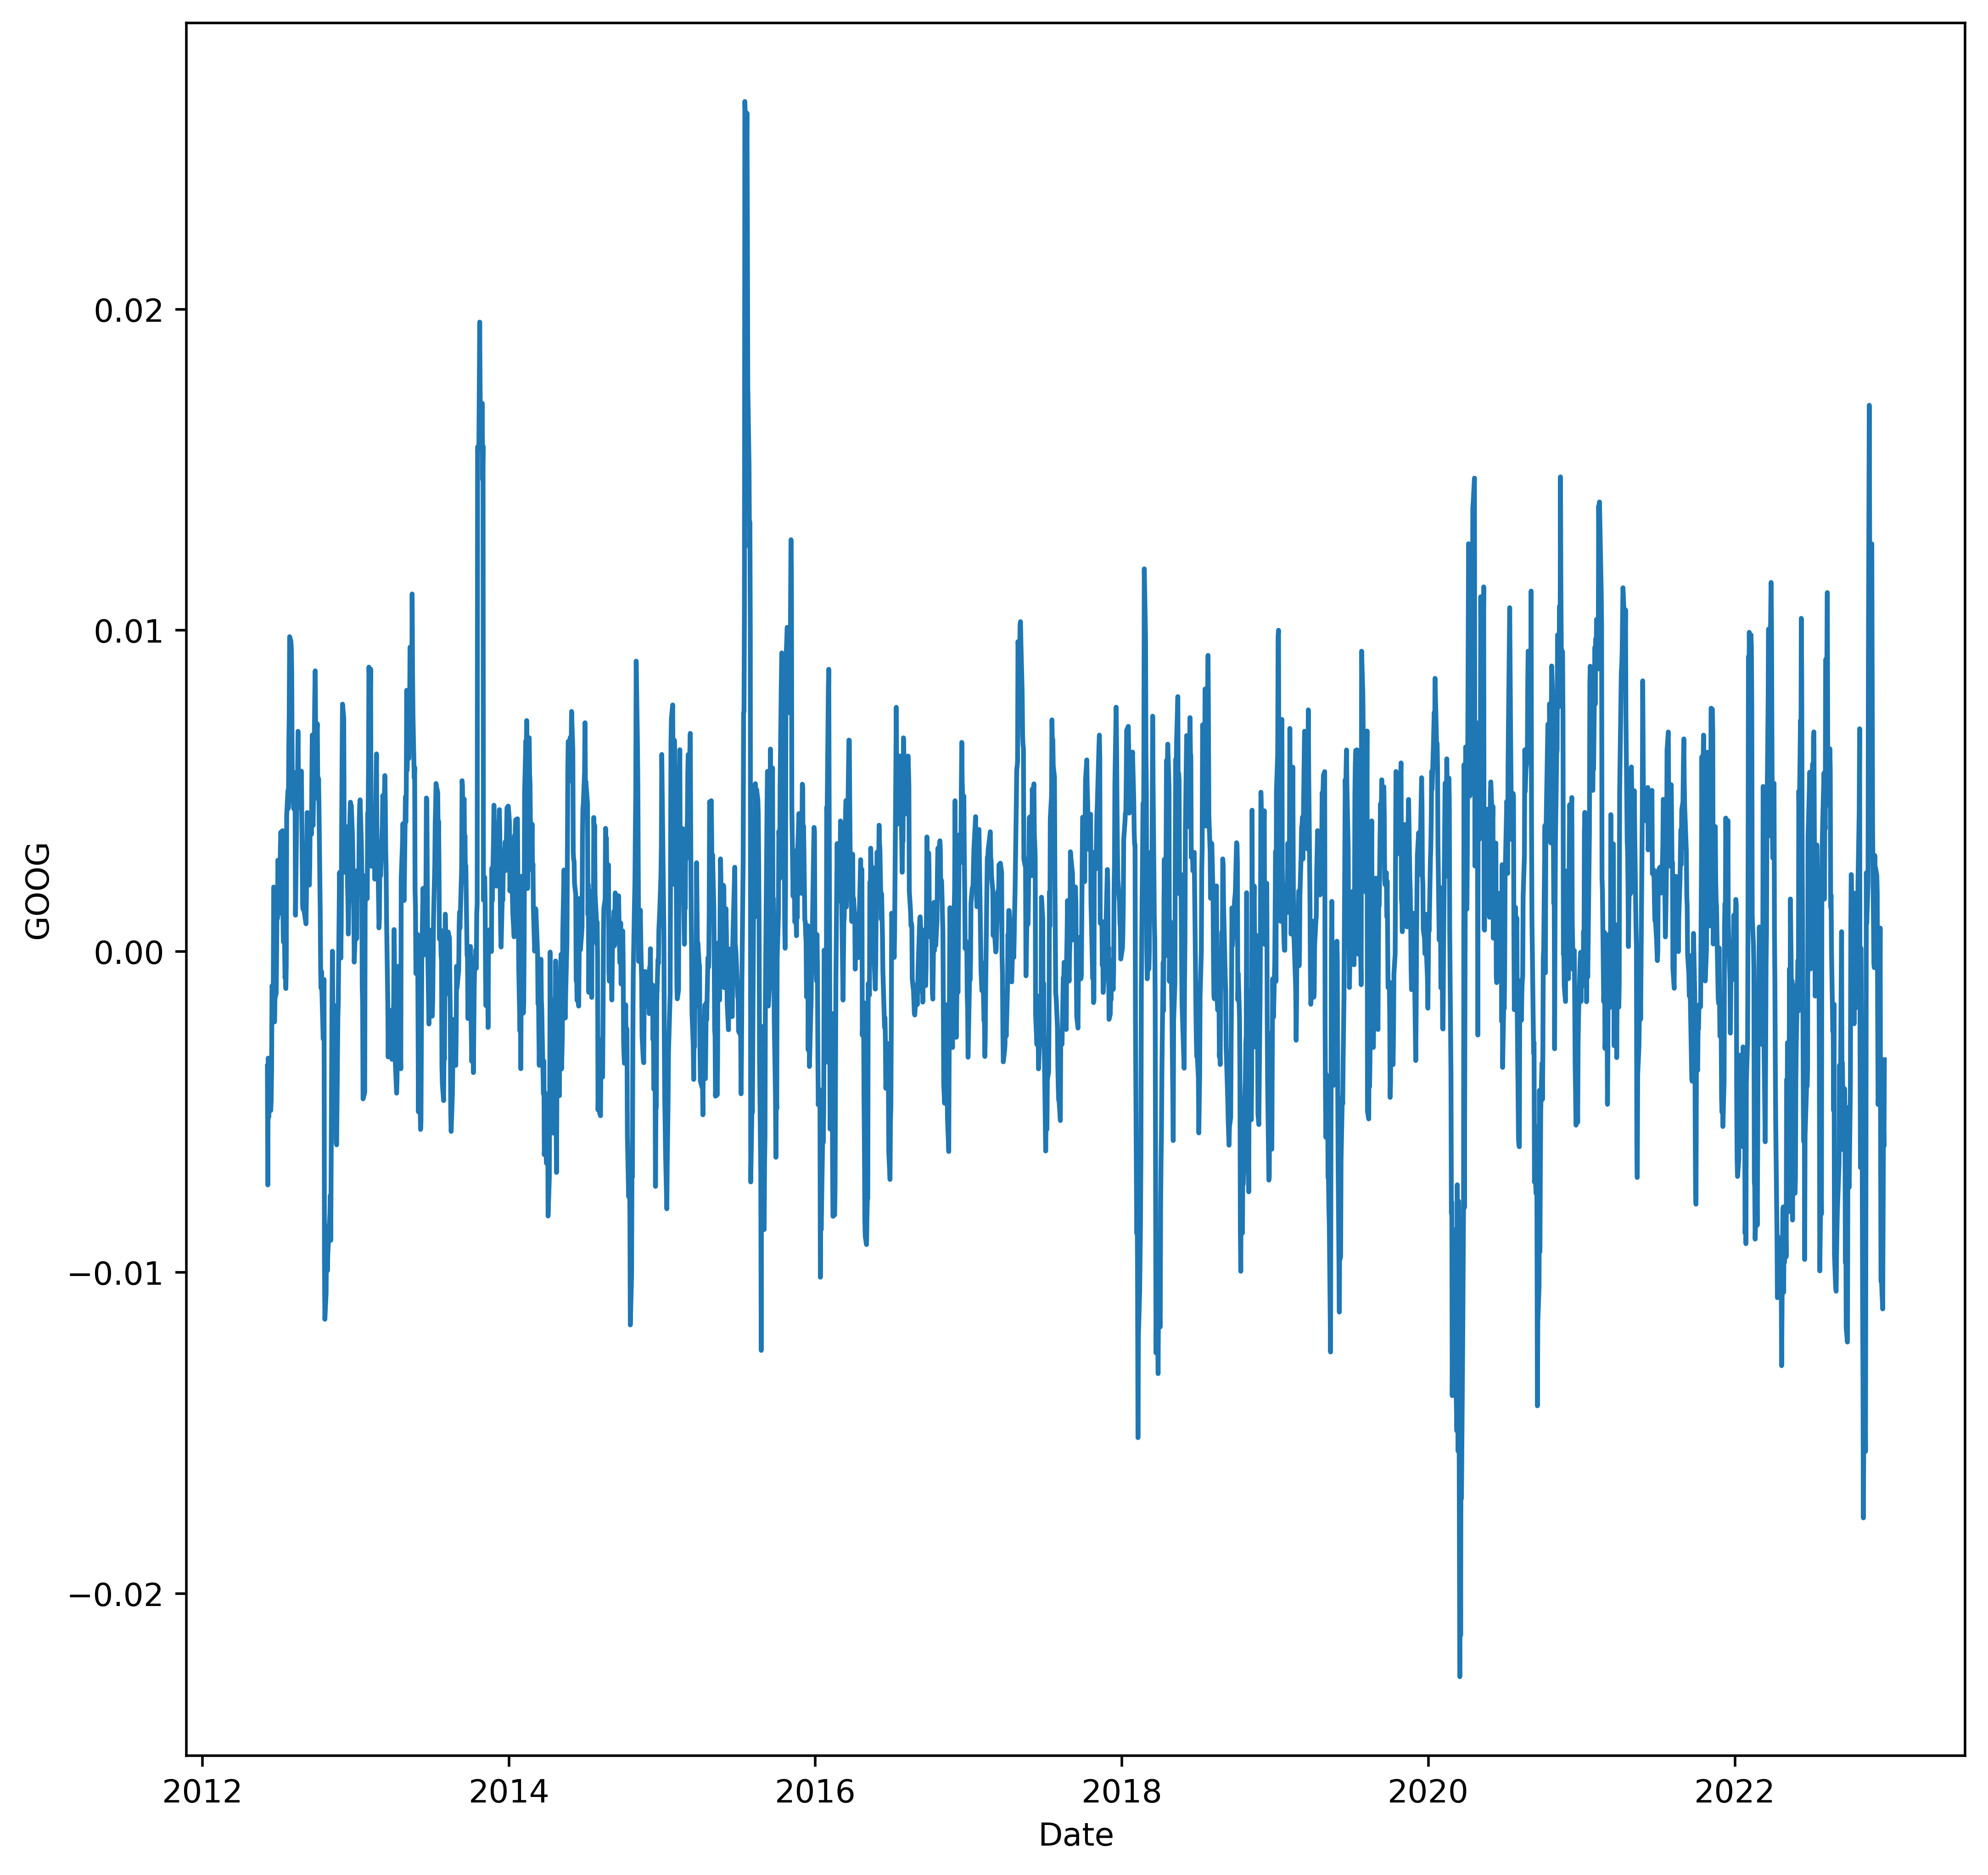

In [14]:
plt.figure(figsize = (10,10), dpi = 500)
sns.lineplot(data = daily_return.rolling(window = 10).mean().dropna(how = 'any')['GOOG'])
#daily_return.rolling(window = 10).std()

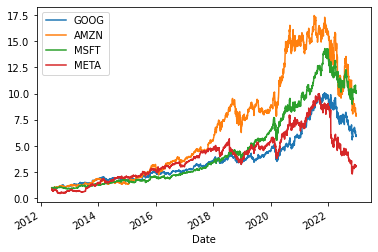

In [20]:
(1+daily_return).cumprod().plot()